Use the IRIS dataset and create a decision tree and check the accuracy label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
iris = pd.read_csv('/Users/gowthamshashank/Desktop/LU/LetsUpgrade/ass-20/IRIS.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
feature = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = np.asarray(feature)
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
y = iris["species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

In [12]:
y_train.shape

(120,)

In [13]:
y_test.shape

(30,)

In [23]:
from sklearn.tree import DecisionTreeClassifier
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
irisTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
predTree = irisTree.predict(X_test)
predTree

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [20]:
pd.DataFrame({"Actual_Data":y_test,
             "New_predict":predTree})

,Actual_Data,New_predict
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [26]:
irisTree.score(X_train,y_train)

0.975

In [27]:
irisTree.score(X_test,y_test)

1.0

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


In [30]:

# your code here

Acc = ((predTree==y_test)==True).count()
Acc

30

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
Data = confusion_matrix(y_test,predTree)
Data

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

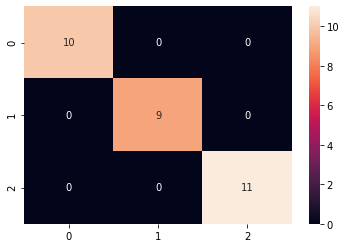

In [33]:
import seaborn as sns
sns.heatmap(Data,annot=True)

In [35]:
print(classification_report(y_test,predTree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



[Text(106.52727272727273, 195.696, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(76.0909090909091, 152.208, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(136.96363636363637, 152.208, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(60.872727272727275, 108.72, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(30.436363636363637, 65.232, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(91.30909090909091, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(213.05454545454546, 108.72, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(152.1818181818182, 65.232, 'X[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(121.74545454545455, 21.744, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(182.61818181818182, 21.744, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(273.92727272727274, 65.232, 'X[2] <= 4.85\nentropy = 0.187\nsa

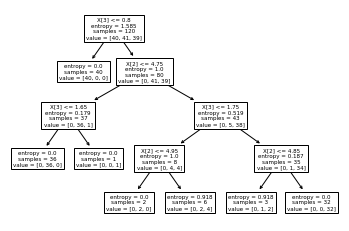

In [40]:
from sklearn import tree
tree.plot_tree(irisTree)